In [0]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import csv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dataset/amazon.csv",encoding="ISO-8859-1")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [5]:
dataset.head(15)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


In [6]:
dataset["month"].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [7]:
dataset["state"].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [8]:
years = dataset["year"].unique()
years

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [9]:
year_info = dataset[dataset["year"] == years[0]]
year_info.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
20,1998,Acre,Fevereiro,0.0,1998-01-01
40,1998,Acre,Março,0.0,1998-01-01
60,1998,Acre,Abril,0.0,1998-01-01
80,1998,Acre,Maio,0.0,1998-01-01
100,1998,Acre,Junho,3.0,1998-01-01
120,1998,Acre,Julho,37.0,1998-01-01
140,1998,Acre,Agosto,130.0,1998-01-01
160,1998,Acre,Setembro,509.0,1998-01-01
180,1998,Acre,Outubro,44.0,1998-01-01


In [10]:
states = year_info['state'].unique()
states


array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [11]:
single_year_state = []

for state in states:
  state_name = state
  count_fire = year_info[year_info['state'] == state].number.sum()
  obj = {"state":state_name, "count_fire":count_fire}
  single_year_state.append(obj)
single_year_state

[{'count_fire': 730.0, 'state': 'Acre'},
 {'count_fire': 86.0, 'state': 'Alagoas'},
 {'count_fire': 278.0, 'state': 'Amapa'},
 {'count_fire': 946.0, 'state': 'Amazonas'},
 {'count_fire': 1224.6870000000001, 'state': 'Bahia'},
 {'count_fire': 1612.0140000000001, 'state': 'Ceara'},
 {'count_fire': 103.0, 'state': 'Distrito Federal'},
 {'count_fire': 218.0, 'state': 'Espirito Santo'},
 {'count_fire': 750.1189999999999, 'state': 'Goias'},
 {'count_fire': 365.884, 'state': 'Maranhao'},
 {'count_fire': 2401.389, 'state': 'Mato Grosso'},
 {'count_fire': 1233.074, 'state': 'Minas Gerais'},
 {'count_fire': 715.586, 'state': 'Pará'},
 {'count_fire': 816.0, 'state': 'Paraiba'},
 {'count_fire': 767.0, 'state': 'Pernambuco'},
 {'count_fire': 1493.577, 'state': 'Piau'},
 {'count_fire': 1149.0, 'state': 'Rio'},
 {'count_fire': 916.0070000000001, 'state': 'Rondonia'},
 {'count_fire': 21.0, 'state': 'Roraima'},
 {'count_fire': 59.0, 'state': 'Santa Catarina'},
 {'count_fire': 3196.0, 'state': 'Sao Paul

In [0]:
year_state_df = pd.DataFrame(single_year_state)

In [13]:
year_state_df

,count_fire,state
0,730.000,Acre
1,86.000,Alagoas
2,278.000,Amapa
3,946.000,Amazonas
4,1224.687,Bahia
5,1612.014,Ceara
6,103.000,Distrito Federal
7,218.000,Espirito Santo
8,750.119,Goias
9,365.884,Maranhao


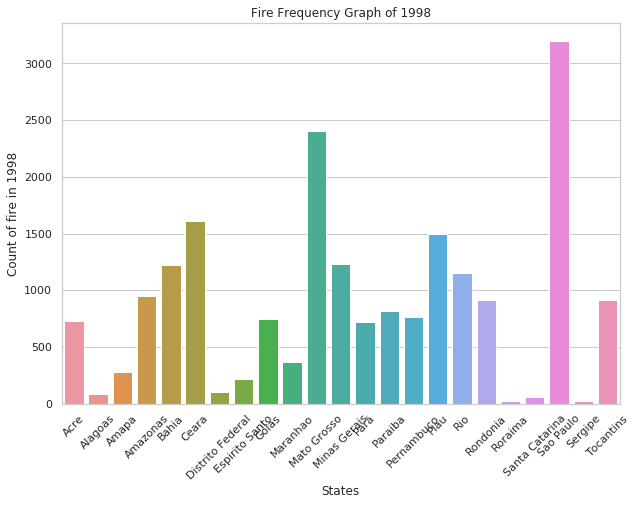

In [14]:
plt.figure(figsize=(10,7))
sns.set(style="whitegrid")
ax = sns.barplot(x="state",y="count_fire",data=year_state_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel("States")
plt.ylabel("Count of fire in 1998")
plt.title("Fire Frequency Graph of 1998")
plt.show()

### Lets see year wise count of fire in different states. Observe in which year which state has maximum fire count

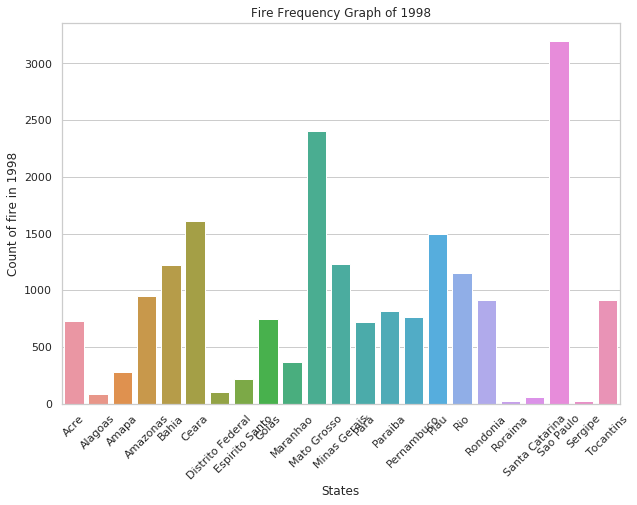

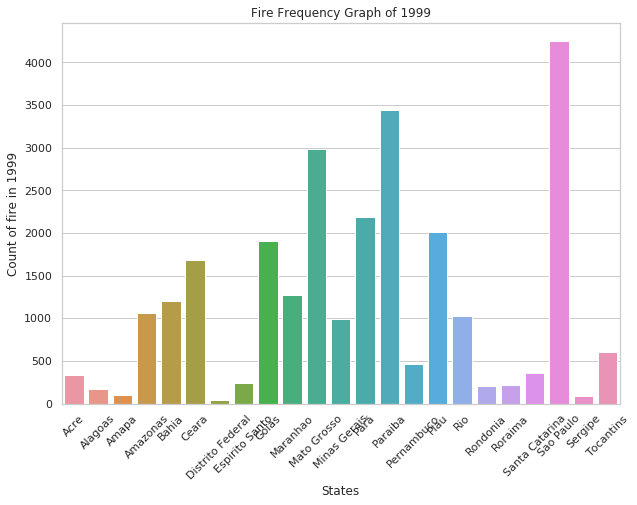

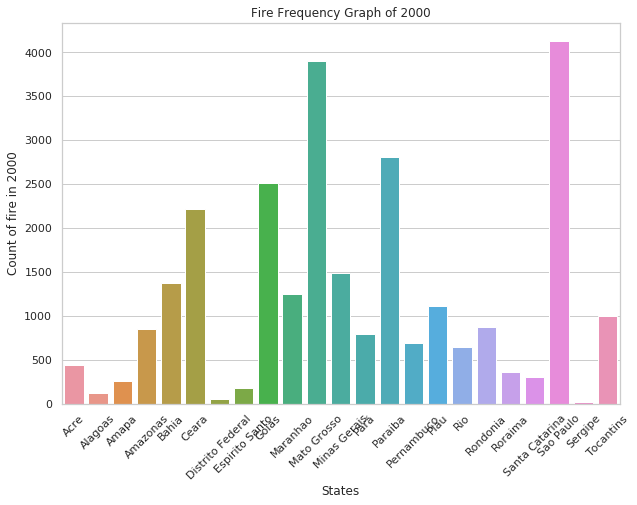

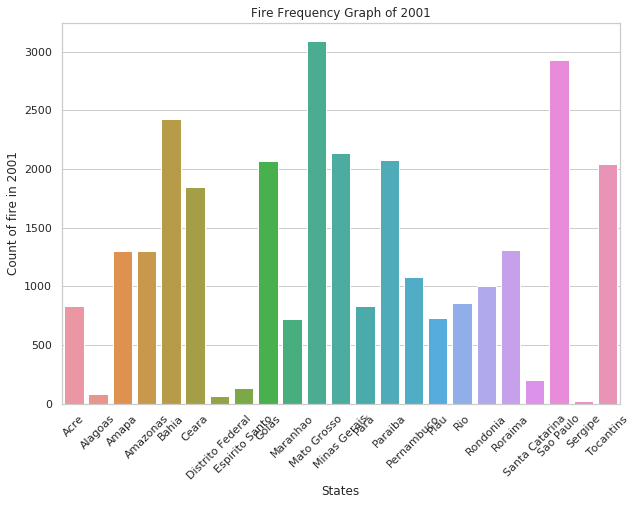

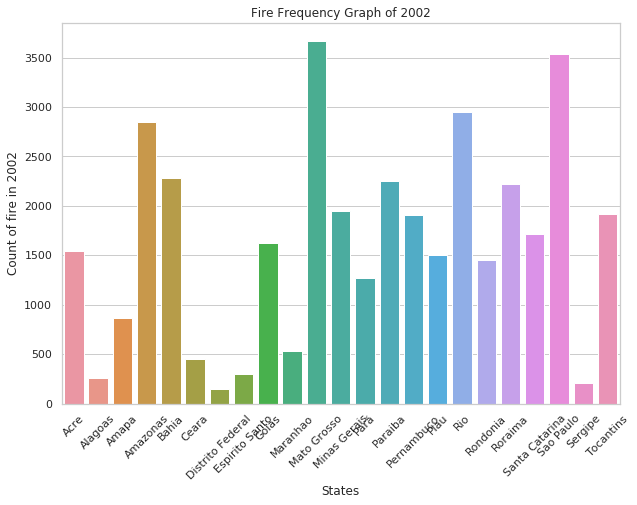

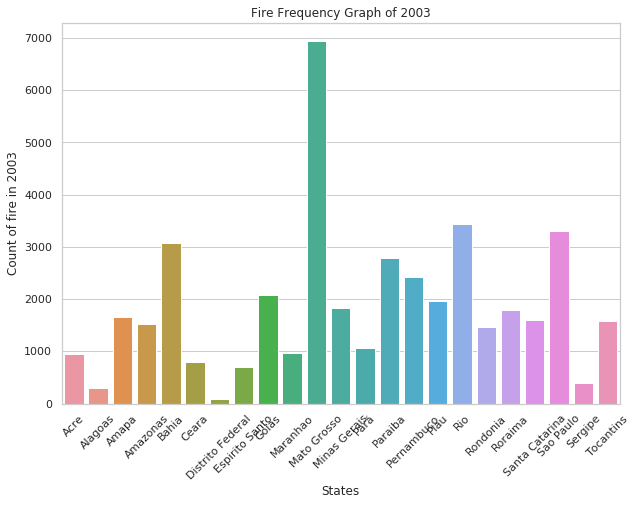

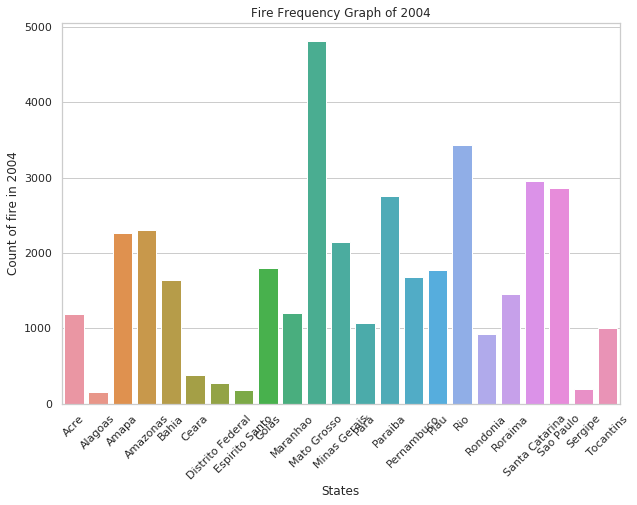

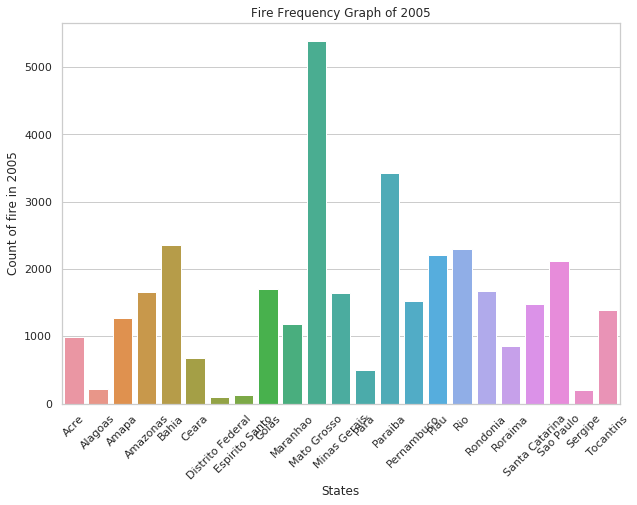

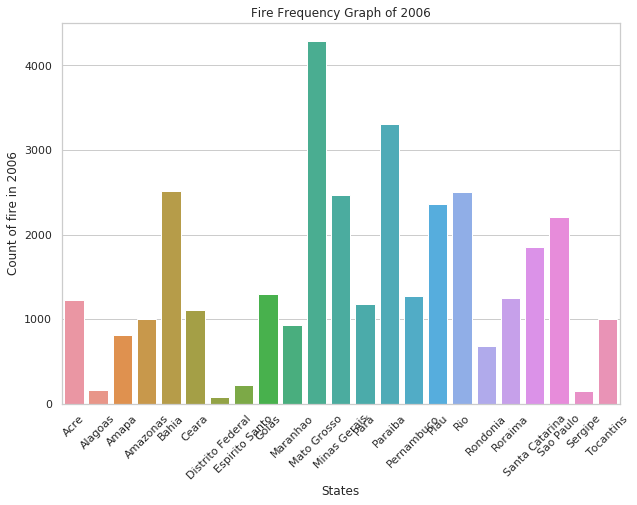

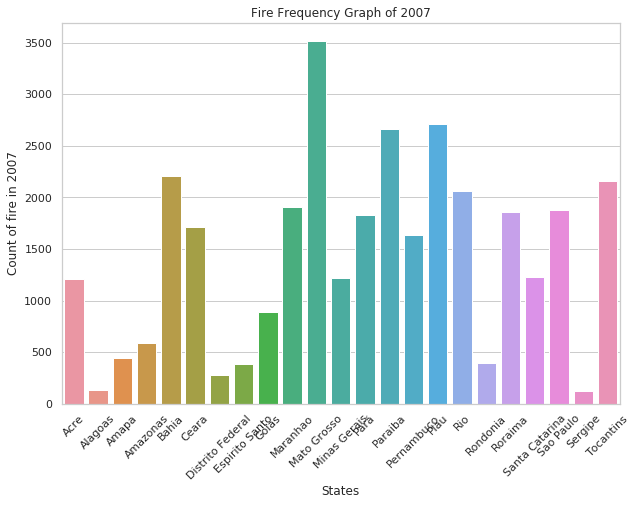

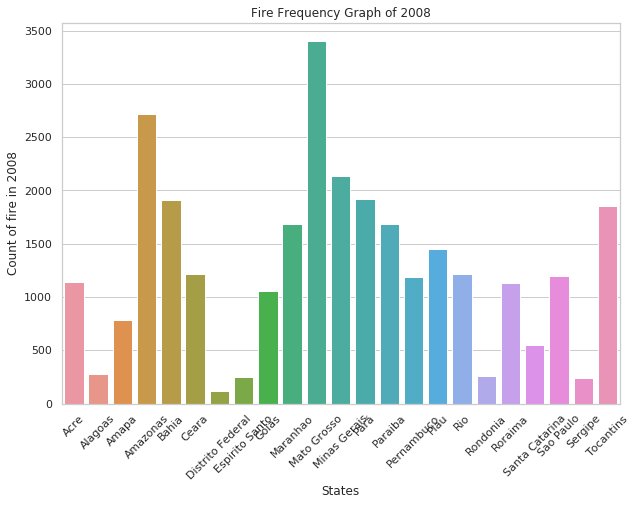

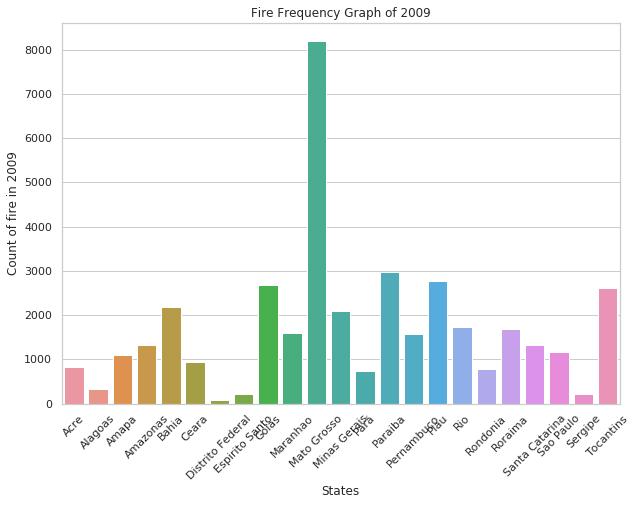

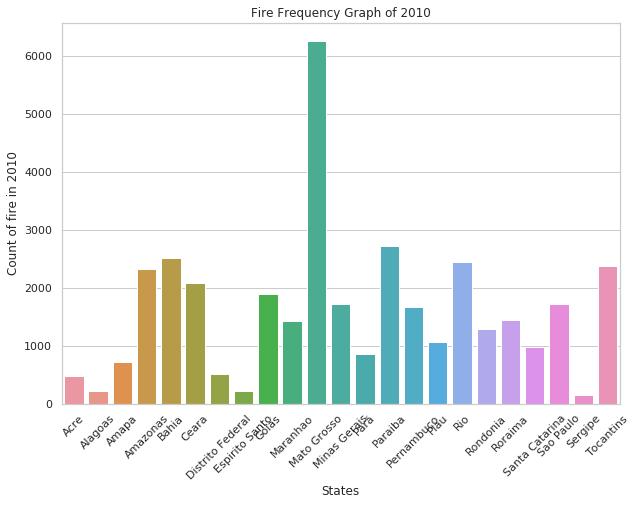

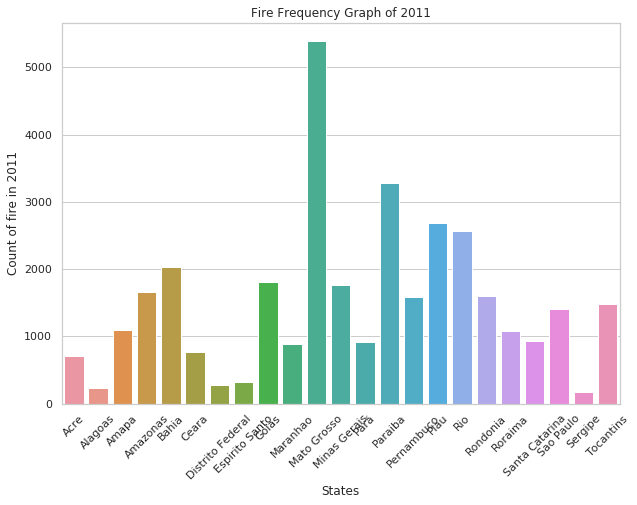

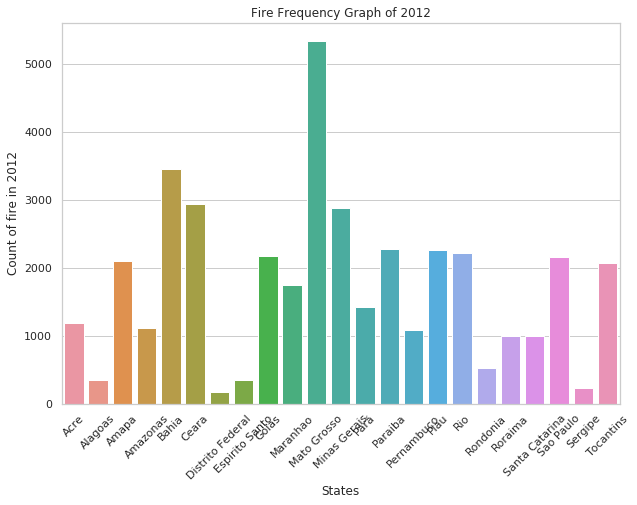

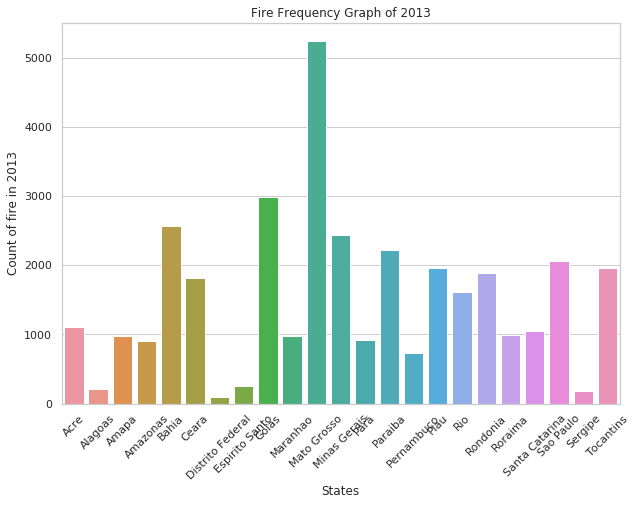

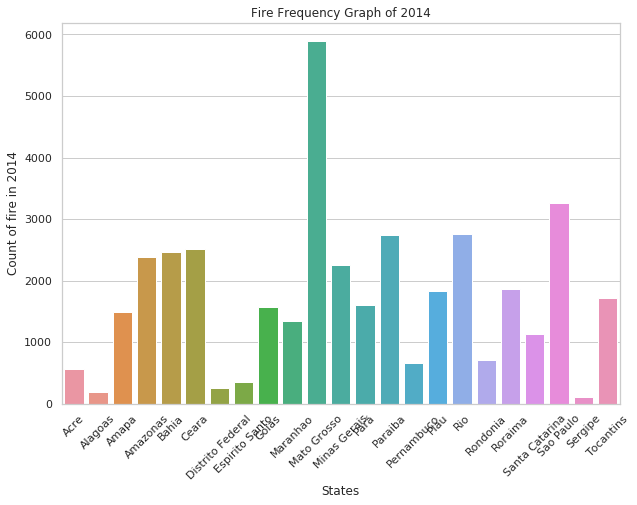

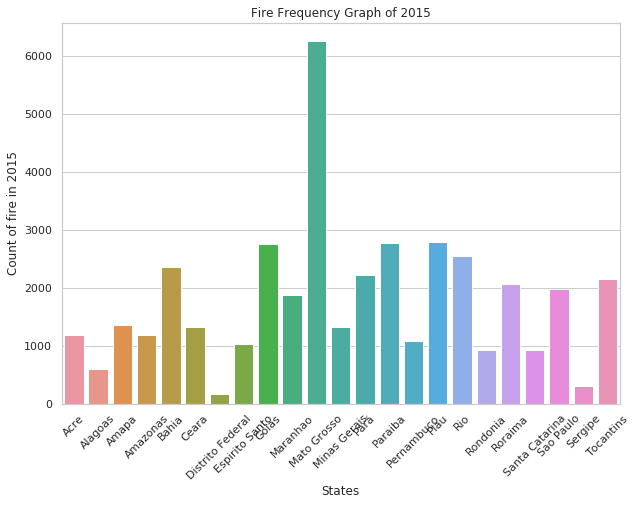

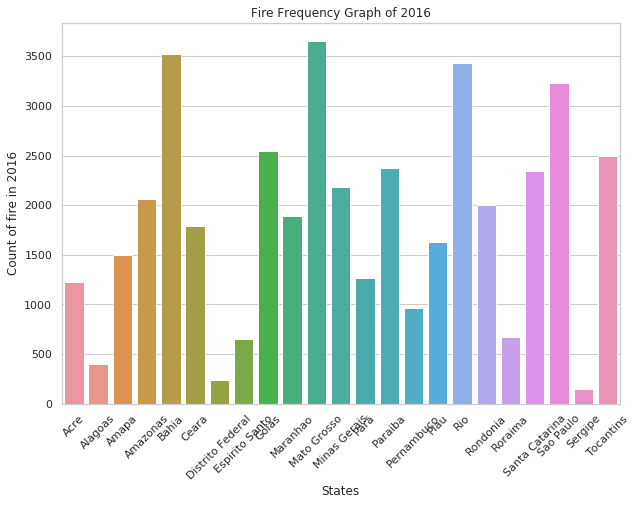

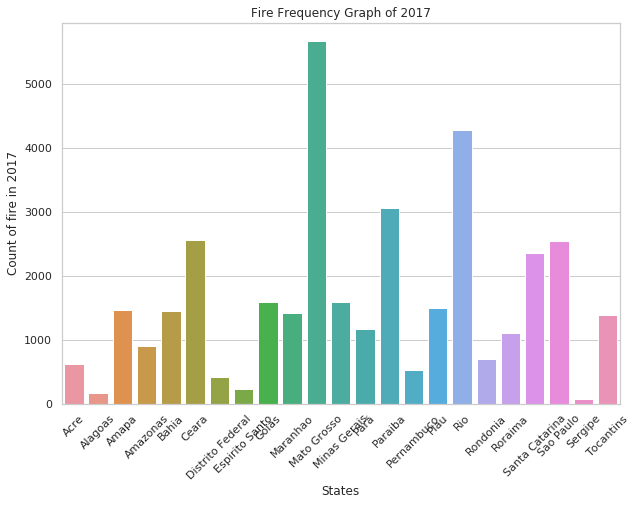

In [15]:
for year in years:
  year_info = dataset[dataset["year"] == year]
  states = year_info['state'].unique()

  single_year_state = []

  for state in states:
    state_name = state
    count_fire = year_info[year_info['state'] == state].number.sum()
    obj = {"state":state_name, "count_fire":count_fire}
    single_year_state.append(obj)

  year_state_df = pd.DataFrame(single_year_state)

  plt.figure(figsize=(10,7))
  sns.set(style="whitegrid")
  ax = sns.barplot(x="state",y="count_fire",data=year_state_df)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  plt.xlabel("States")
  plt.ylabel("Count of fire in {0}".format(year))
  plt.title("Fire Frequency Graph of {0}".format(year))
  plt.show()

In [16]:
dataset.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [0]:
years = dataset['year'].unique()
single_state_data = []

for year in years:
  single_year_data_df = dataset[dataset['year'] == year]
  states = single_year_data_df['state'].unique()
  for state in states:
    max_count = single_year_data_df[single_year_data_df['state'] == state].number.max()
    month = single_year_data_df[(single_year_data_df['state'] == state) & (single_year_data_df['number'] == max_count)].month.values[0]
    obj = {
        "month" : month,
        "max_count" : max_count,
        "state" : state,
        "year" : year
    }
    single_state_data.append(obj)

In [26]:
max_count_month_df = pd.DataFrame(single_state_data)
max_count_month_df[max_count_month_df["year"] == 1998].head()

,max_count,month,state,year
0,509.0,Setembro,Acre,1998
1,32.0,Dezembro,Alagoas,1998
2,131.0,Novembro,Amapa,1998
3,321.0,Agosto,Amazonas,1998
4,815.0,Agosto,Bahia,1998


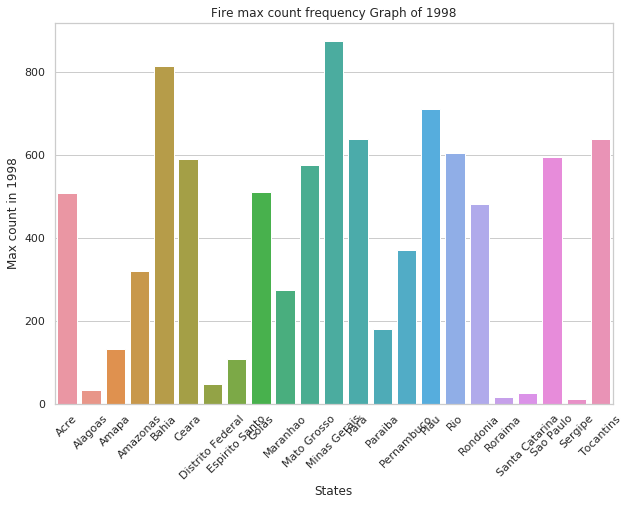

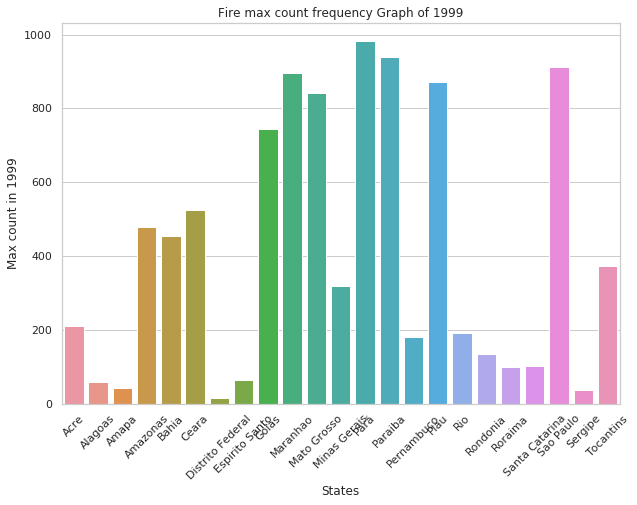

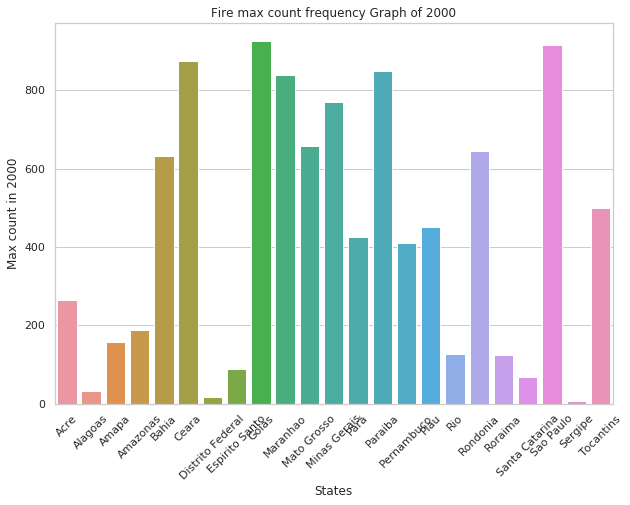

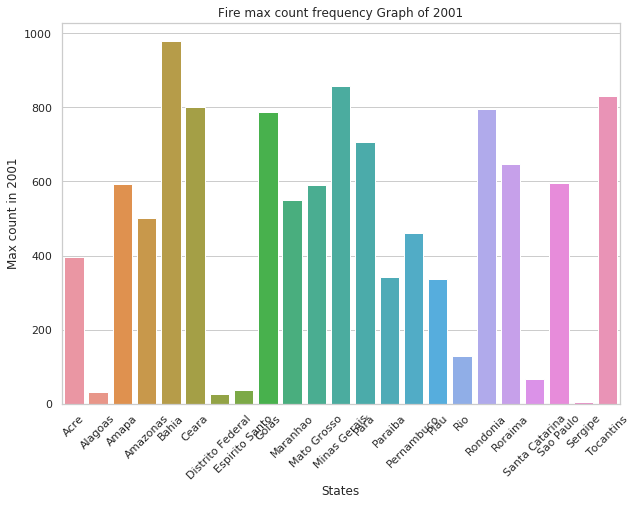

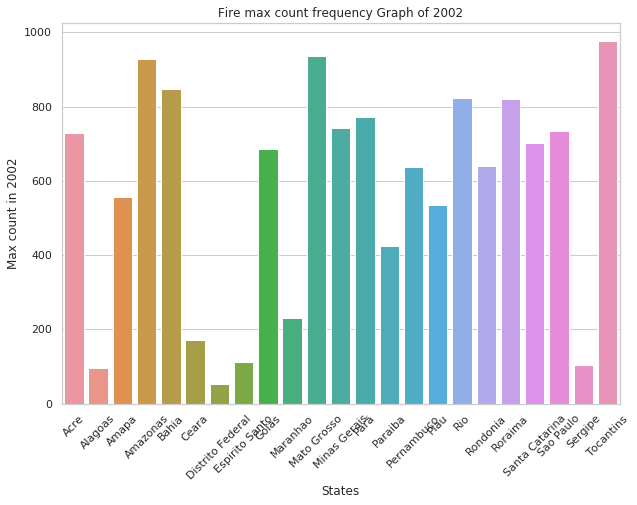

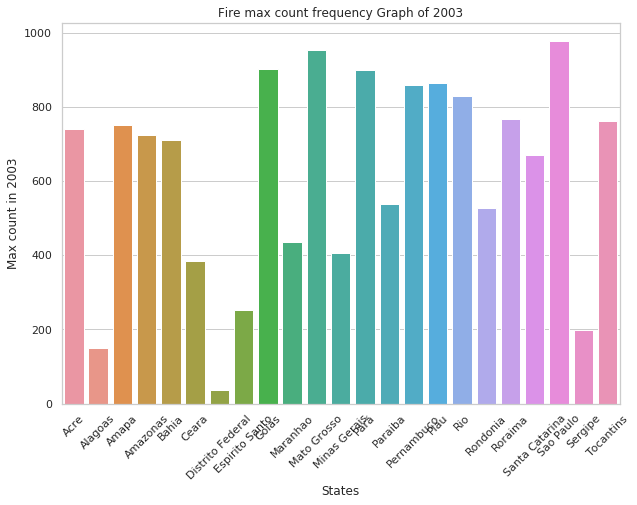

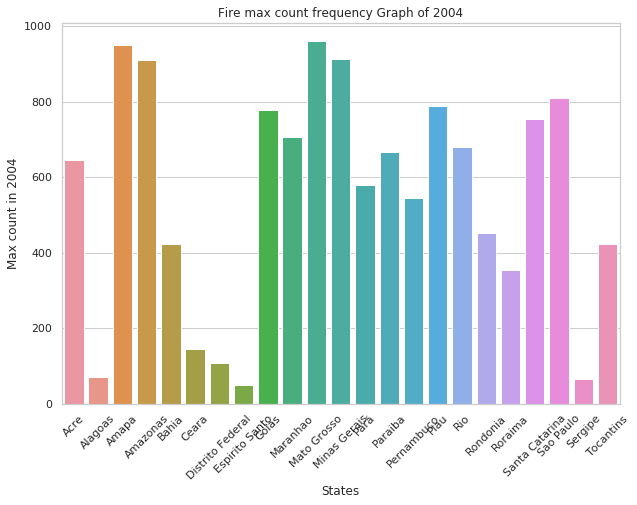

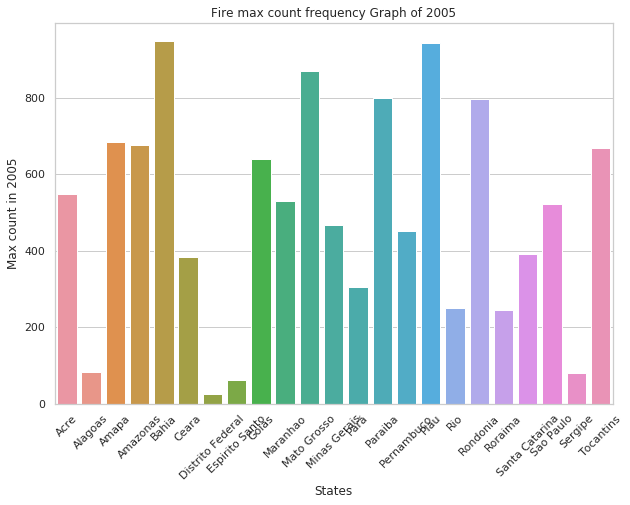

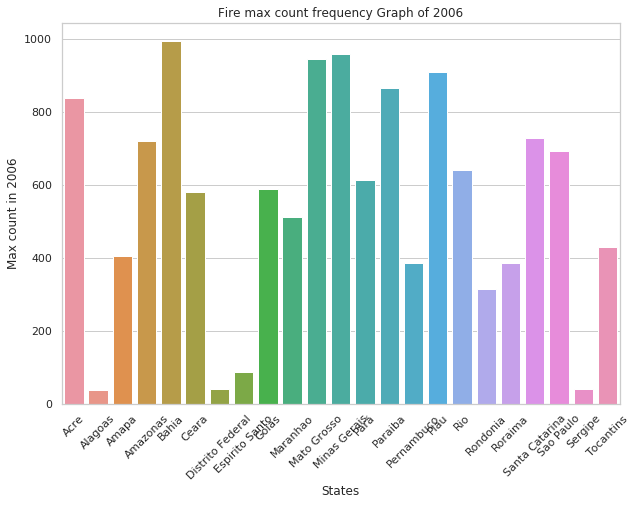

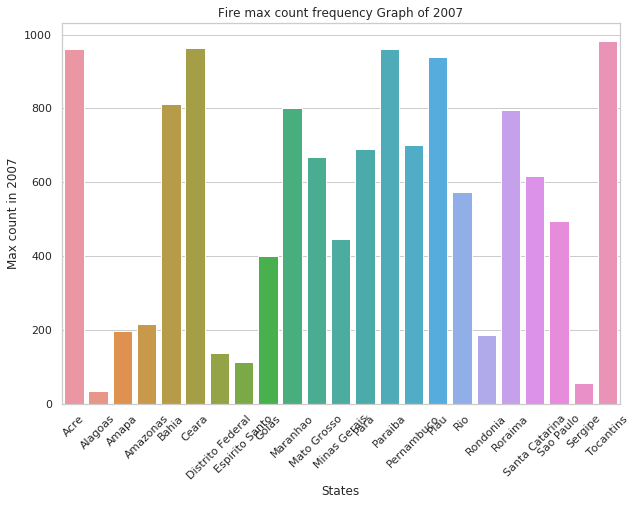

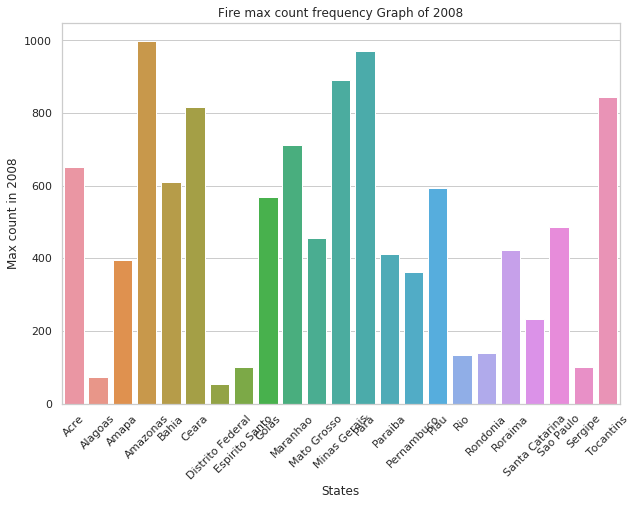

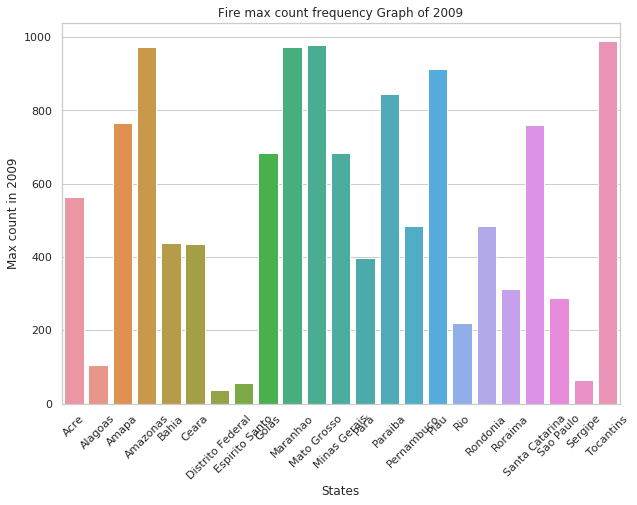

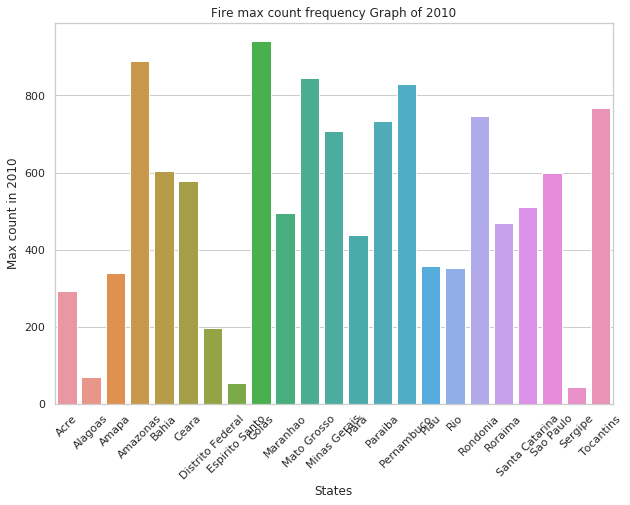

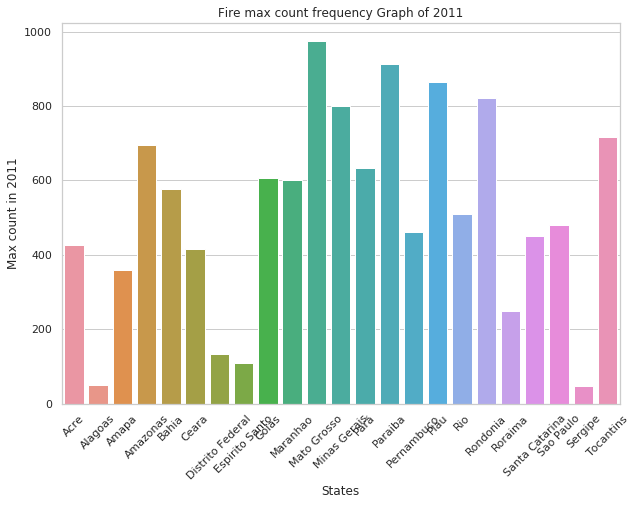

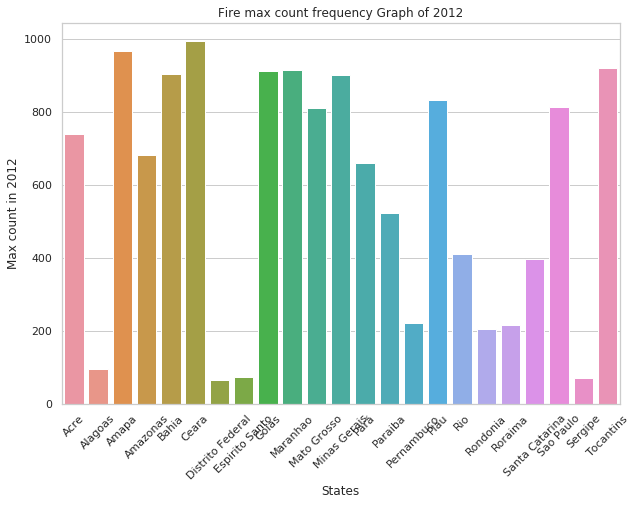

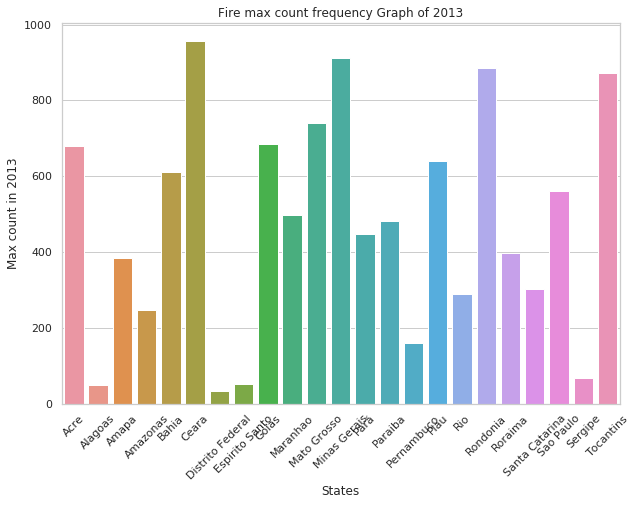

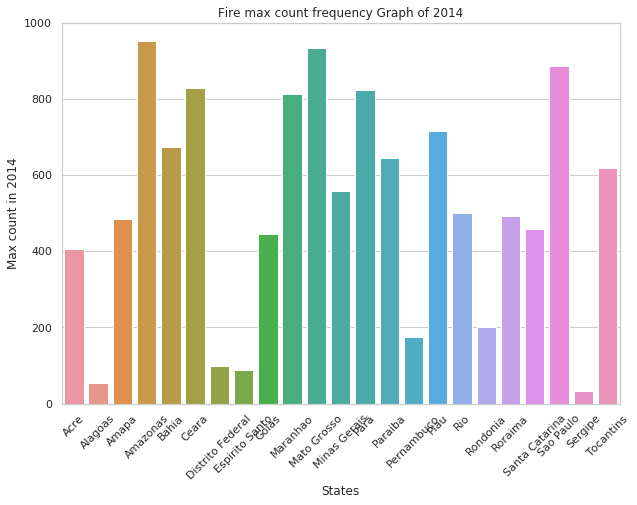

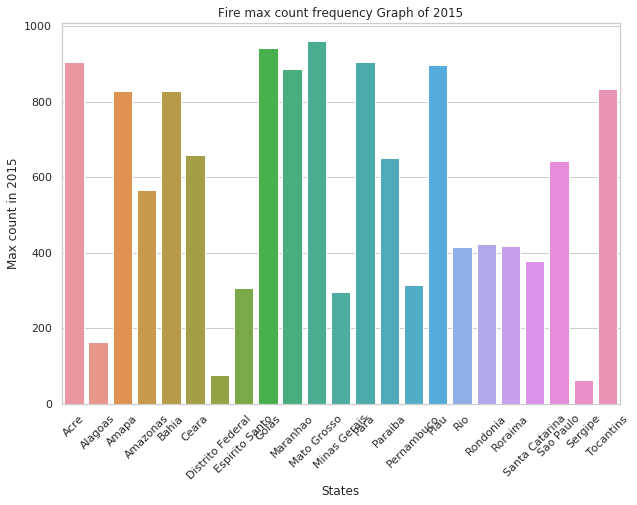

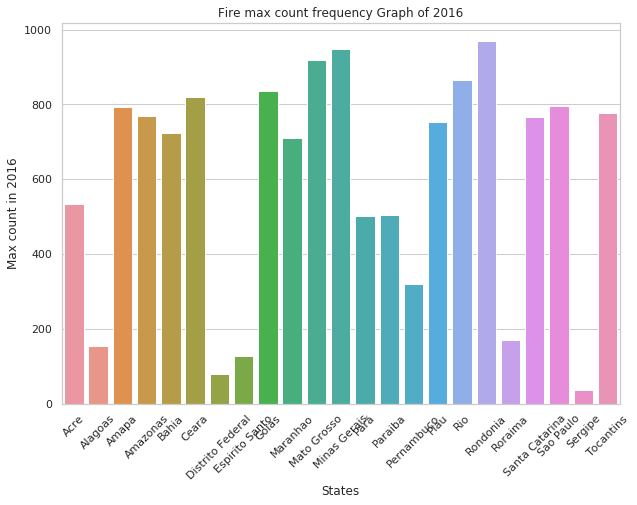

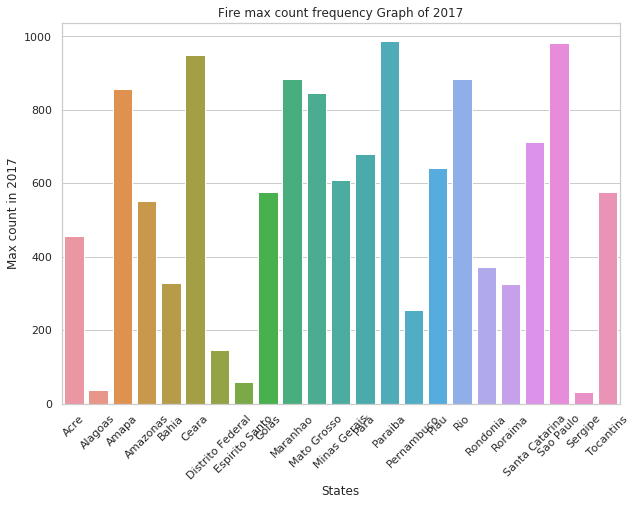

In [27]:
years = dataset['year'].unique()
for year in years:
  year_wise_df = max_count_month_df[max_count_month_df["year"] == year]
  plt.figure(figsize=(10,7))
  sns.set(style="whitegrid")
  ax = sns.barplot(x="state",y="max_count",data=year_wise_df)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  plt.xlabel("States")
  plt.ylabel("Max count in {0}".format(year))
  plt.title("Fire max count frequency Graph of {0}".format(year))
  plt.show()
